In [1]:
import csv

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
#path = '../../bert-cmp/bert/'
path = '../sparse/'

In [5]:
results_df = pd.read_csv(path+'cls_output-methodname-sota/test_results.tsv', header=None, sep='\t')
results_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,357,358,359,360,361,362,363,364,365,366
0,4.112116e-07,6.431073e-07,1.849602e-07,2.901857e-07,1.896978e-07,9.998808e-01,1.181713e-07,7.831349e-08,1.391216e-06,1.022416e-07,...,4.974994e-08,7.632985e-08,4.758867e-08,7.957695e-08,1.858005e-07,3.643930e-08,5.673511e-08,3.031996e-08,2.925358e-07,8.484311e-08
1,3.001465e-04,8.451400e-03,7.237033e-05,3.140152e-05,2.350010e-04,1.294978e-04,4.570283e-04,4.366606e-05,1.534946e-04,2.121972e-04,...,1.281680e-04,1.202347e-05,7.841870e-05,3.458156e-04,2.887429e-04,6.659747e-05,3.862405e-05,8.485643e-05,1.376286e-04,2.540933e-03
2,9.228524e-06,3.372166e-05,9.086550e-06,6.295843e-05,4.948483e-05,7.433358e-05,6.279901e-04,8.630683e-06,6.407512e-06,8.860663e-05,...,1.801482e-05,1.693699e-05,1.927819e-05,1.354420e-04,1.218900e-04,1.574835e-05,1.220086e-05,1.585285e-05,2.775633e-05,2.249711e-05
3,1.625279e-03,4.320768e-04,7.980427e-04,4.398703e-03,7.204175e-04,6.877603e-03,2.316440e-03,2.695289e-02,1.449860e-03,4.616880e-03,...,4.829602e-04,2.176314e-04,6.519357e-04,1.142669e-03,5.279170e-03,7.605951e-04,2.147494e-04,4.885770e-04,1.646929e-03,6.149090e-04
4,6.679990e-07,1.118133e-07,1.356601e-07,3.105948e-07,9.812925e-08,2.302669e-06,3.953598e-07,7.584490e-08,8.587980e-08,2.130783e-07,...,5.218141e-08,1.580854e-07,6.571570e-08,1.611555e-07,1.264892e-06,5.802754e-08,2.287778e-08,6.092194e-08,1.229654e-07,1.394618e-07
5,2.491103e-08,1.568859e-07,6.609765e-08,3.131541e-07,3.274807e-07,1.259794e-07,2.869727e-08,1.484190e-08,1.604501e-08,3.322065e-08,...,2.739106e-08,2.026524e-08,2.147384e-08,2.954245e-07,2.366482e-07,2.395059e-08,1.943951e-08,2.001486e-08,4.482562e-08,3.366723e-08
6,1.175133e-05,6.302856e-06,1.538858e-05,1.975774e-06,6.743026e-06,8.401215e-06,9.915345e-05,3.187398e-06,1.144623e-05,3.738823e-06,...,5.627634e-06,1.611392e-05,8.483434e-06,8.323984e-06,1.623187e-05,5.388600e-06,4.647758e-06,6.885765e-06,1.631825e-06,2.885853e-06
7,1.037626e-07,1.353383e-08,7.288905e-09,1.098443e-08,4.959495e-08,5.956720e-08,1.022102e-07,1.365160e-07,3.209238e-08,4.519928e-08,...,1.253997e-08,2.981331e-08,1.712155e-08,6.362873e-08,3.363054e-08,2.021101e-08,1.268721e-08,2.116206e-08,4.744892e-08,2.007199e-08
8,6.833109e-05,3.645496e-05,2.202850e-05,1.781727e-05,3.195088e-05,1.572230e-04,1.019967e-05,1.786529e-05,2.262647e-05,3.677092e-05,...,7.263287e-06,3.531726e-05,8.178367e-06,2.379867e-05,4.802139e-05,6.168165e-06,2.953384e-05,6.080852e-06,1.518107e-05,4.603200e-05
9,1.659851e-05,3.445375e-06,7.167127e-05,2.247873e-05,5.783238e-06,4.164083e-05,8.055934e-05,1.418358e-05,1.055363e-04,3.648655e-05,...,6.429980e-06,2.886483e-05,8.141491e-06,2.397202e-05,1.312219e-05,5.940739e-06,3.801329e-06,6.381523e-06,7.229489e-06,1.309865e-06


In [6]:
results_df.shape

(75, 367)

In [7]:
vocab_label_df = pd.read_csv(path+'sparse_fname2_vocab-label.txt', header=None)
vocab_label_df.shape

(367, 1)

In [114]:
n=10
preds = []; probs = []
for idx, row in results_df.iterrows():
    top_n = list(np.argsort(-row)[:n])
    preds.append(top_n[:n])
    probs.append(row[top_n[:n]])

In [115]:
preds

[[5, 326, 27, 325, 327, 169, 50, 353, 349, 31],
 [13, 17, 317, 1, 324, 12, 91, 16, 18, 366],
 [17, 18, 12, 16, 20, 83, 19, 106, 86, 6],
 [245, 223, 225, 27, 207, 7, 70, 314, 82, 106],
 [27, 165, 59, 5, 326, 121, 51, 221, 242, 56],
 [12, 17, 111, 84, 82, 106, 315, 107, 49, 182],
 [24, 184, 333, 180, 251, 242, 182, 6, 156, 141],
 [25, 312, 233, 158, 145, 240, 93, 225, 309, 157],
 [31, 32, 28, 30, 33, 234, 228, 340, 5, 232],
 [24, 50, 150, 191, 141, 157, 123, 199, 133, 47],
 [68, 71, 304, 69, 12, 115, 111, 120, 124, 310],
 [12, 17, 106, 111, 107, 84, 251, 315, 82, 27],
 [13, 20, 310, 42, 15, 242, 6, 50, 154, 18],
 [101, 327, 248, 156, 206, 23, 26, 163, 204, 87],
 [110, 120, 111, 118, 122, 117, 115, 109, 59, 128],
 [111, 110, 114, 12, 118, 303, 112, 115, 349, 120],
 [12, 17, 111, 106, 315, 107, 84, 82, 251, 142],
 [123, 50, 166, 135, 53, 24, 141, 111, 308, 153],
 [50, 24, 53, 157, 123, 138, 203, 158, 130, 141],
 [127, 128, 129, 68, 361, 130, 112, 113, 218, 110],
 [127, 128, 129, 68, 361, 1

In [116]:
probs

[5      0.999881
 326    0.000010
 27     0.000006
 325    0.000004
 327    0.000002
 169    0.000002
 50     0.000002
 353    0.000002
 349    0.000002
 31     0.000002
 Name: 0, dtype: float64, 13     0.867377
 17     0.014933
 317    0.013496
 1      0.008451
 324    0.007979
 12     0.005869
 91     0.004207
 16     0.003798
 18     0.003697
 366    0.002541
 Name: 1, dtype: float64, 17     0.961273
 18     0.009632
 12     0.003729
 16     0.001567
 20     0.001309
 83     0.001292
 19     0.000922
 106    0.000880
 86     0.000693
 6      0.000628
 Name: 2, dtype: float64, 245    0.059546
 223    0.051535
 225    0.041228
 27     0.030961
 207    0.029695
 7      0.026953
 70     0.022590
 314    0.020581
 82     0.019688
 106    0.018881
 Name: 3, dtype: float64, 27     0.999906
 165    0.000005
 59     0.000004
 5      0.000002
 326    0.000002
 121    0.000002
 51     0.000002
 221    0.000002
 242    0.000002
 56     0.000002
 Name: 4, dtype: float64, 12     9.999586e-01
 17 

In [10]:
label_keras_df = pd.read_csv(path+'sparse_fname2_split_magret_label_val.txt', header=None)
label_keras_df.shape

(75, 1)

In [11]:
label_pytorch_df = pd.read_csv(path+'sparse_split_magret_label_val.txt', header=None)
label_pytorch_df.shape

(621, 5)

In [12]:
label_skl_df = pd.read_csv(path+'sklearn_cls_split_magret_label_val.txt', header=None)
label_skl_df.shape

FileNotFoundError: [Errno 2] File b'../sparse/sklearn_cls_split_magret_label_val.txt' does not exist: b'../sparse/sklearn_cls_split_magret_label_val.txt'

In [13]:
labels= []; labels_str =[]
#label_dfs = [label_keras_df, label_skl_df, label_pytorch_df]
label_dfs = [label_keras_df]
for label_df in label_dfs:
    for idx, row in label_df.iterrows():
        labels.append(vocab_label_df.index[vocab_label_df[0]==str(row[0])][0])
        labels_str.append(row[0])

In [14]:
labels_str

['deserialize',
 'set_model',
 'get_monitor_value',
 'is_indexed_slices',
 'from_config',
 '__init__',
 '__call__',
 'get_config',
 'glorot_normal',
 'call',
 'update',
 '__init__',
 'add',
 'get_word_index',
 'decode_predictions',
 'preprocess_input',
 '__init__',
 '_merge_function',
 '_merge_function',
 'add',
 'subtract',
 'multiply',
 'dot',
 'call',
 'call',
 '__init__',
 'compute_output_shape',
 'trainable_weights',
 'updates',
 'get_config',
 '__init__',
 '__init__',
 'step',
 'get_config',
 'call',
 'get_config',
 'compute_mask',
 'from_config',
 'losses',
 'call',
 'call',
 'bias_initializer',
 'noised',
 '__init__',
 '__init__',
 'compute_output_shape',
 'cast_to_floatx',
 'image_dim_ordering',
 'eval',
 'ndim',
 'gather',
 'argmax',
 'softmax',
 '__init__',
 'infer_outputs',
 '_has_nchw_support',
 '_to_tensor',
 'eval',
 'min',
 'flatten',
 'batch_flatten',
 'get_value',
 'sigmoid',
 'is_placeholder',
 'ones',
 'identity',
 'update_sub',
 'sum',
 'arange',
 'ctc_cost',
 'fol

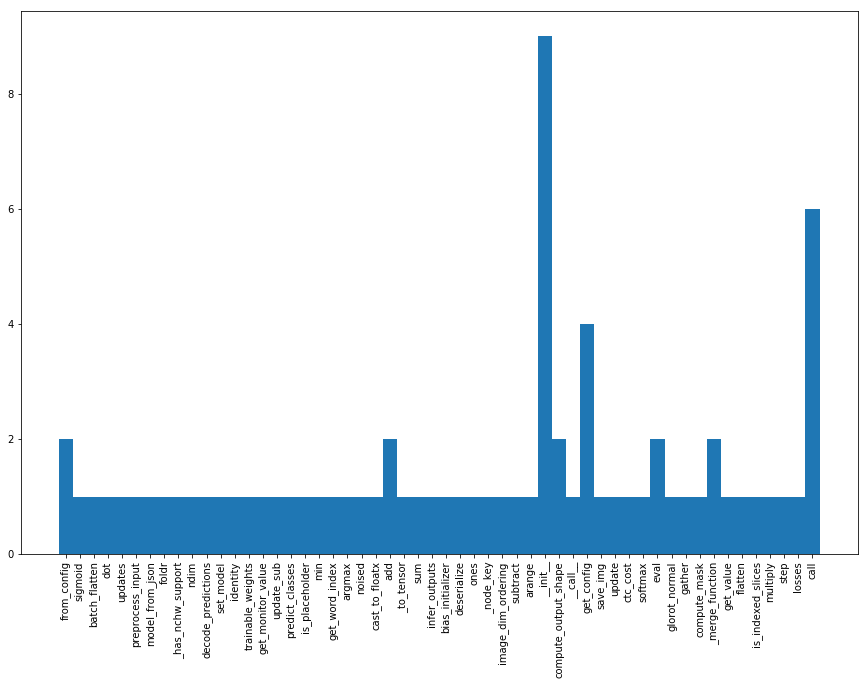

In [16]:
c = Counter(labels_str)

plt.figure(figsize=(15,10))
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation=90)
plt.show()

In [17]:
vocab_label_df.loc[0][0]

'clone'

In [19]:
snippet = pd.read_csv(path+'sparse_fname2_split_magret_tk_val.txt', header=None)
snippet.loc[10][0]

'[CLS] FunctionDef arguments arg self arg args If Call Name Attribute data Name Name Expr Call Attribute update Attribute data Name Starred Name Raise Name'

In [130]:
pred_str = []; score = 0; rank = []
for idx, r in enumerate(preds):
    print(snippet.loc[idx][0])
    print("Label =", labels_str[idx])
    preds_ = []
    print("Pred  =")
    correct = False
    
    for i in range(7):
        p = vocab_label_df.loc[r[i]][0] 
        if p==labels_str[idx]:
            score +=1
            rank.append(i+1)
            print("---- {}. {} ({})".format(i,p,np.around(probs[idx][r[i]],3)))
            correct = True
        else:
            print("     {}. {} ({})".format(i,p,np.around(probs[idx][r[i]],3)))
        preds_.append(p)
    if correct == False:
        rank.append(i)
    pred_str.append(preds_)
    print()

[CLS] FunctionDef arguments arg config arg custom objects NameConstant Return Call Name Name keyword Call Name keyword Name keyword Str
Label = deserialize
Pred  =
---- 0. deserialize (1.0)
     1. model_from_config (0.0)
     2. from_config (0.0)
     3. unpickle_model (0.0)
     4. model_from_yaml (0.0)
     5. clear_session (0.0)
     6. call (0.0)

[CLS] FunctionDef arguments arg self arg model For Name callback Attribute callbacks Name Expr Call Attribute set model Name Name
Label = set_model
Pred  =
     0. set_params (0.867)
     1. on_train_begin (0.015)
     2. __setstate__ (0.013)
     3. clone_model (0.008)
     4. pickle_model (0.008)
     5. __init__ (0.006)
     6. __enter__ (0.004)

[CLS] FunctionDef arguments arg self arg logs Assign Name monitor value Call Attribute get Name Attribute monitor Name If Compare Name Is NameConstant Expr Call Attribute warn Name BinOp Str Mod Tuple Attribute monitor Name Call Attribute join Str Call Name Call Attribute keys Name Name Retur

     2. std (0.014)
     3. min (0.014)
     4. logsumexp (0.013)
     5. max (0.013)
     6. mean (0.012)

[CLS] FunctionDef arguments arg start arg stop arg step arg dtype NameConstant Num Str Expr Str Return Call Attribute arange Name Name keyword Name keyword Name keyword Name
Label = arange
Pred  =
     0. map_fn (0.387)
     1. truncated_normal (0.065)
     2. slice (0.064)
     3. predict_generator (0.033)
     4. evaluate_generator (0.026)
     5. eye (0.014)
     6. _wait_queue (0.014)

[CLS] FunctionDef arguments arg predict arg Y Assign Tuple Name log probs Name mask Call Name Name Call Name Name Assign Name common factor Call Attribute max Name Name Assign Name total log prob BinOp Call Attribute log Name Call Attribute sum Name Subscript Call Attribute exp Name BinOp Name Sub Name Index Call Attribute nonzero Name Add Name Return UnaryOp USub Name
Label = ctc_cost
Pred  =
     0. mean_absolute_error (0.124)
     1. compute_mask (0.069)
     2. mean_squared_error (0.067)
  

In [129]:
np.around(probs[idx][r[i]],3)

1.0

In [22]:
score/len(preds)

0.68

In [23]:
1/np.mean(rank)

0.3712871287128713

In [24]:
from scipy import io

In [84]:
m = io.mmread('../sparse/adj/1_sparse_fname2_split_magret_adj.mtx').toarray()

In [85]:
import matplotlib.pyplot as plt

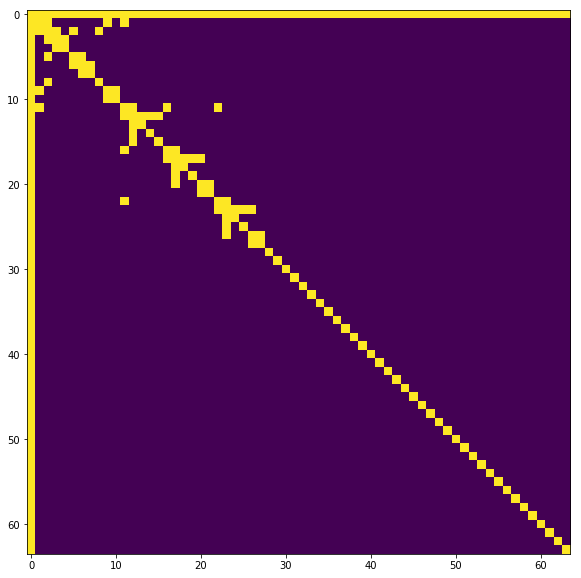

In [86]:
plt.figure(figsize=(10,10))
plt.imshow(m)

In [87]:
np.count_nonzero(m[56,:])

2

In [88]:
eye = np.eye(64)

In [89]:
shuffle_idx = np.random.permutation(20)

In [90]:
G = nx.from_numpy_matrix(m)
#shuffled_adj = nx.adjacency_matrix(G, nodelist=shuffle_idx).todense()

In [96]:
emb_len = len(snippet.loc[1][0].split(' '))
emb_len

20

In [97]:
G = nx.from_numpy_matrix(m[:emb_len,:emb_len])

In [98]:
edges = list(G.edges(0))
G.remove_edges_from(edges)

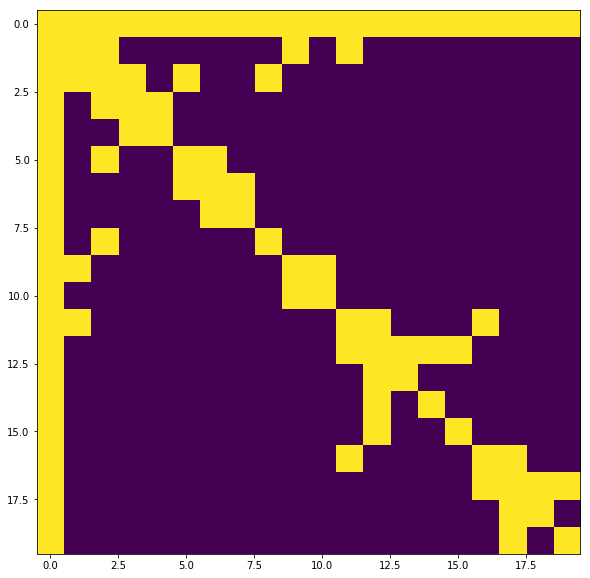

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(m[:emb_len,:emb_len])

In [101]:
snippet.loc[1][0].split(' ')

['[CLS]',
 'FunctionDef',
 'arguments',
 'arg',
 'self',
 'arg',
 'model',
 'For',
 'Name',
 'callback',
 'Attribute',
 'callbacks',
 'Name',
 'Expr',
 'Call',
 'Attribute',
 'set',
 'model',
 'Name',
 'Name']

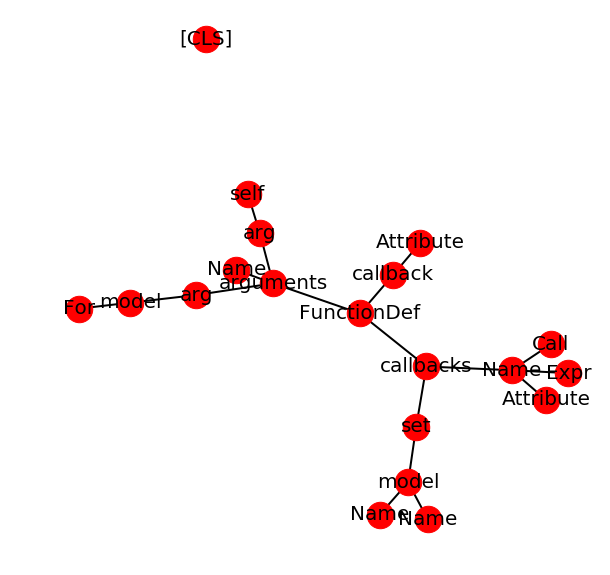

In [103]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=2)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),snippet.loc[1][0].split(' '))), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

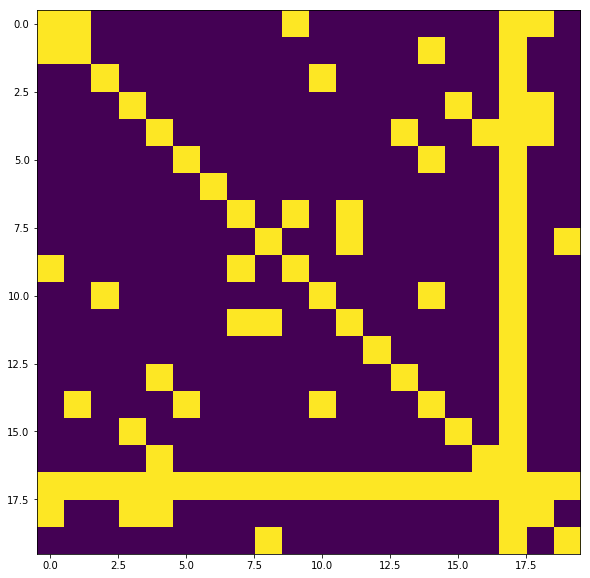

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(shuffled_adj)
#plt.xticks(range(20), idx);

In [33]:
eye[:len(shuffled_adj), :len(shuffled_adj)] = shuffled_adj

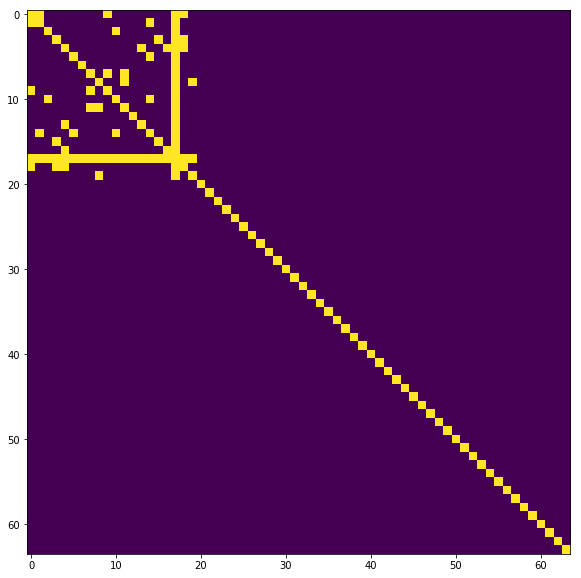

In [34]:
plt.figure(figsize=(10,10))
plt.imshow(eye)

In [55]:
enc_df = pd.read_csv(path+'cls_output-embed/encoder_results.tsv', header=None, sep='\t')
enc_df.shape

(4800, 768)

In [104]:
embeddings = enc_df.values.reshape((75,64,768))

In [74]:
snippet.loc[5][0], len(snippet.loc[5][0].split(' '))

('[CLS] FunctionDef arguments arg self arg minval arg maxval arg seed UnaryOp USub Num Num NameConstant Assign Attribute minval Name Name Assign Attribute maxval Name Name Assign Attribute seed Name Name',
 31)

In [76]:
snippet.loc[11][0], len(snippet.loc[11][0].split(' '))

('[CLS] FunctionDef arguments arg self arg sequence arg use multiprocessing arg shuffle NameConstant NameConstant Expr Call Attribute init Call Name Name Name Name Name Assign Attribute shuffle Name Name',
 29)

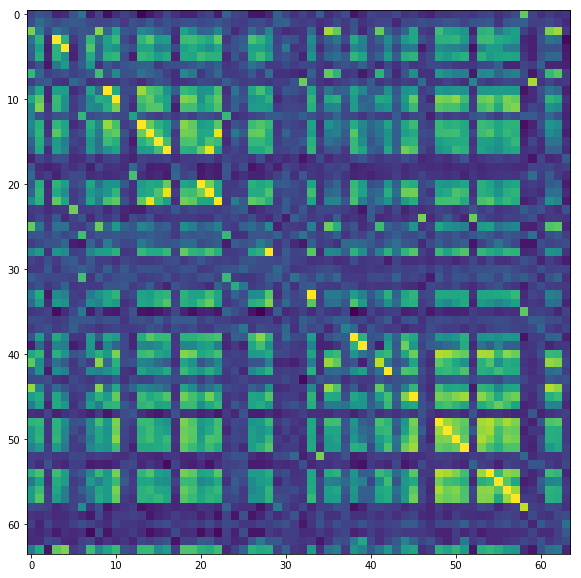

In [69]:
sim = np.dot(embeddings[:,5], embeddings[:,11].T)
plt.figure(figsize=(10,10))
plt.imshow(sim)

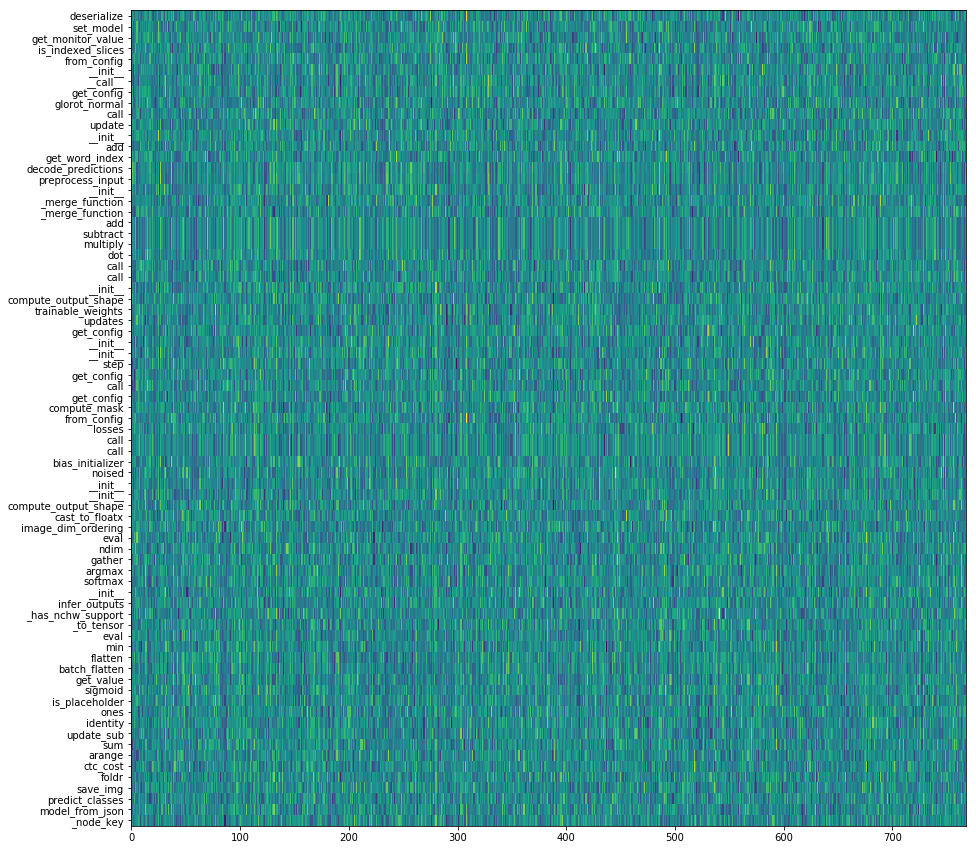

In [105]:
plt.figure(figsize=(20,15))
plt.imshow(embeddings[:,0], aspect=10)
plt.yticks(range(75), labels_str);

In [106]:
embeddings.shape

(75, 64, 768)

In [107]:
from sklearn.metrics.pairwise import cosine_similarity

In [110]:
cos = cosine_similarity(embeddings[:,0])
cos.shape

(75, 75)

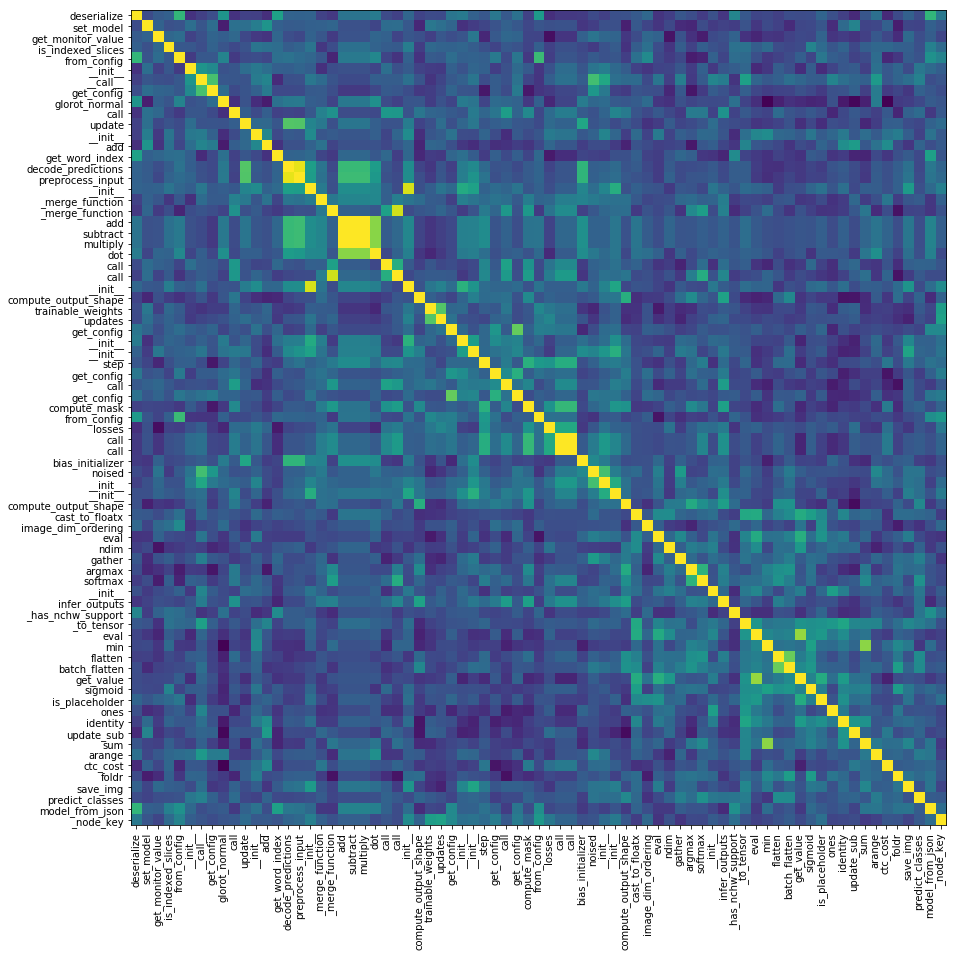

In [114]:
plt.figure(figsize=(20,15))
plt.imshow(cos)
plt.yticks(range(75), labels_str);
plt.xticks(range(75), labels_str, rotation=90);

In [148]:
score_sim = 0
for i in range(75):
    print(label_df.loc[i][0])
    rnk = 7
    ranked = np.argsort(cos[i])[::-1][:rnk+1]
    r = preds[i]
    match = False
    
    for j in range(rnk):
        if (label_df.loc[ranked[0]][0]==label_df.loc[ranked[j+1]][0]) & (match == False):
            score_sim +=1
            match==True
        sim_pred = label_df.loc[ranked[j+1]][0]
        pred_pred = vocab_label_df.loc[r[j]][0]
        print("--- s: {}  p: {}".format(sim_pred, pred_pred))
    print()

deserialize
--- s: from_config  p: deserialize
--- s: model_from_json  p: from_config
--- s: get_word_index  p: get_config
--- s: from_config  p: in_test_phase
--- s: glorot_normal  p: model_from_config
--- s: _has_nchw_support  p: _postprocess_conv3d_output
--- s: dot  p: _prepare_name

set_model
--- s: add  p: __init__
--- s: update_sub  p: set_params
--- s: __init__  p: on_epoch_end
--- s: trainable_weights  p: on_train_end
--- s: call  p: on_train_begin
--- s: update  p: predict
--- s: updates  p: __enter__

get_monitor_value
--- s: __init__  p: on_train_begin
--- s: noised  p: on_epoch_end
--- s: from_config  p: __init__
--- s: save_img  p: on_train_end
--- s: image_dim_ordering  p: get_config
--- s: call  p: on_batch_end
--- s: __init__  p: validate_file

is_indexed_slices
--- s: sigmoid  p: deserialize
--- s: model_from_json  p: from_config
--- s: __init__  p: stop_gradient
--- s: __init__  p: _prepare_name
--- s: __init__  p: get_config
--- s: _to_tensor  p: is_sparse
--- s: _h


predict_classes
--- s: softmax  p: argmax
--- s: flatten  p: predict_proba
--- s: batch_flatten  p: compute_output_shape
--- s: compute_output_shape  p: argmin
--- s: __call__  p: losses
--- s: gather  p: cell
--- s: _to_tensor  p: one_hot

model_from_json
--- s: deserialize  p: get
--- s: get_word_index  p: deserialize
--- s: from_config  p: on_epoch_end
--- s: _has_nchw_support  p: model_from_yaml
--- s: from_config  p: model_from_config
--- s: get_config  p: from_config
--- s: add  p: forward

_node_key
--- s: updates  p: _make_node_key
--- s: trainable_weights  p: from_config
--- s: from_config  p: is_keras_tensor
--- s: __init__  p: raise_duplicate_arg_error
--- s: get_config  p: get_output_shape_at
--- s: from_config  p: get_uid
--- s: __init__  p: count_params



In [149]:
score_sim/75

0.8533333333333334